# pip install pandas
# pip install geopy
# pip install pyephem
# pip install matplotlib

In [1]:
from datetime import date, time, datetime, timedelta
import pandas as pd
import enphase as e
import matplotlib.pyplot as pyplot
import numpy as np
import pprint
from calendar import isleap

In [2]:
e.print_environ()
pp = pprint.PrettyPrinter(indent=3)
a_few_days_ago = e.today() - timedelta(days=3)
not_long_ago = e.today() - timedelta(days=30)
current_summer_solstice = date(e.today().year,6,21)

ENPHASE_API_VERSION: v2
ENPHASE_SYSTEM_ID: 1779982
ENPHASE_APP_USER_ID: 4d546b304d5455794d513d3d0a
ENPHASE_APP_KEY: 371f77b1f3836684576fadc9080d9dad
ENPHASE_STATS_PATH: /Users/electronhead/dev/data/enphasev2/


In [3]:
e.save_to_files(complete_days=False, start_date=a_few_days_ago)

SUCCESS: 114 rows written to  /Users/electronhead/dev/data/enphasev2/stats_2023-01-22.csv
SUCCESS: 114 rows written to  /Users/electronhead/dev/data/enphasev2/stats_2023-01-23.csv
SUCCESS: 112 rows written to  /Users/electronhead/dev/data/enphasev2/stats_2023-01-24.csv
SUCCESS: 59 rows written to  /Users/electronhead/dev/data/enphasev2/stats_2023-01-25.csv


{'dates_processed': 4, 'last_date_processed': datetime.date(2023, 1, 25)}

In [4]:
data = e.compute_data_frame()
e.augment_data_frame(data)
data_copy = data.copy()
# data15 = e.compute_data_frame(increment=15)
# data30 = e.compute_data_frame(increment=30)
data60 = e.compute_data_frame(increment=60)

In [5]:
def slap(arg):
    print_glee = lambda glee: print(glee, '\n')
    if flea == 0: # PIVOT FORWARD WATT HOURS BY DATE AND TIME
        glee = e.pivot_by_date_time(data60, values=e.f, start_date=not_long_ago, stop_date=e.today(), start_time=time(8,0,0), stop_time=time(21,0,0))
        print_glee(glee)
    elif flea == 1: # PIVOT BACKWARD WATT HOURS BY DATE AND TIME
        glee = e.pivot_by_date_time(data60, values=e.b, start_date=not_long_ago, stop_date=e.today(), start_time=time(8,0,0), stop_time=time(21,0,0))
        print_glee(glee)
    elif flea == 2: # STATS
        glee = e.stats_by_time(data, column=e.wh, start_date=e.online_date(), stop_date=e.today())
        glee.plot(figsize=(15,8),grid=True)
    elif flea == 3: # SUM BY TIME AND PLOT
        glee = data[[e.d,e.wh]].groupby([e.d]).sum()
        glee.plot(figsize=(15,8),grid=True)
    elif flea == 4: # SUM RECENT WATT HOURS
        wh = e.by_date(data[[e.d,e.wh]], not_long_ago, e.today())
        grouped = wh.groupby([e.d]).sum()
        print_glee(grouped)
        print_glee(grouped[e.wh].agg([len,np.sum,np.min,np.mean,np.max]).apply(lambda x: int(x)))
    elif flea == 10: # SUM RECENT WATT HOURS minus ONE YEAR
        wh = e.by_date(data[[e.d,e.wh]], not_long_ago-timedelta(days=365), e.today()-timedelta(days=365))
        grouped = wh.groupby([e.d]).sum()
        print_glee(grouped)
        print_glee(grouped[e.wh].agg([len,np.sum,np.min,np.mean,np.max]).apply(lambda x: int(x)))
    elif flea == 5: # PLOT YESTERDAY'S WATT HOURS
        glee = e.by_date(data, e.yesterday(), e.yesterday())[[e.t,e.wh]]
        glee.plot(x="time",figsize=(15,8),grid=True)
    elif flea == 6: # PLOT TODAY'S WATT HOURS
        glee = e.by_date(data, e.today(), e.today())[[e.t,e.wh]]
        glee.plot(x="time",figsize=(15,8),grid=True)
    elif flea == 7: # YESTERDAY'S RAW STATS
        pp.pprint(e.request_stats(e.yesterday()).json())
    elif flea == 8: # TODAY'S RAW STATS
        pp.pprint(e.request_stats(e.today()).json())
    elif flea == 9: # SUM OF PGE WATT HOURS FOR LAST TIME PERIOD
        date1 = date(2022,11,22)
        date2 = date(2022,12,21)
        glee = e.by_date(data, date1, date2)[e.wh].sum()
        print(f"{glee/1000} kWh for prior PGE billing period ({date1} to {date2})\n")
    elif flea == 11: # 31_day rolling aggregation -- sum, min, mean, max
        wh = e.by_date(data[[e.d,e.wh]], e.pge_online_date(), e.today())
        grouped = wh.groupby([e.d]).sum()
        rolling = grouped.rolling(31).agg([np.sum])
        print_glee(rolling)
        rolling.plot(figsize=(15,8),grid=True)
        rolling = grouped.rolling(31).agg([np.min])
        rolling.plot(figsize=(15,8),grid=True)
        rolling = grouped.rolling(31).agg([np.mean])
        rolling.plot(figsize=(15,8),grid=True)
        rolling = grouped.rolling(31).agg([np.max])
        rolling.plot(figsize=(15,8),grid=True)
        print_glee(rolling)
        

+++++++++++++++++
flea: 9
+++++++++++++++++
114.027 kWh for prior PGE billing period (2022-11-22 to 2022-12-21)

+++++++++++++++++
flea: 4
+++++++++++++++++
            watt_hours
date                  
2022-12-26         885
2022-12-27        1107
2022-12-28        3916
2022-12-29        2031
2022-12-30        1800
2022-12-31        4028
2023-01-01        5707
2023-01-02        4631
2023-01-03        5342
2023-01-04        2170
2023-01-05        2487
2023-01-06        4296
2023-01-07        2703
2023-01-08        3768
2023-01-09        3781
2023-01-10        5701
2023-01-11        2890
2023-01-12        2592
2023-01-13        2965
2023-01-14        1692
2023-01-15        2861
2023-01-16        6145
2023-01-17        5786
2023-01-18        2066
2023-01-19        3001
2023-01-20        5329
2023-01-21        4813
2023-01-22        6553
2023-01-23        7316
2023-01-24        8200
2023-01-25        1218 

len         31
sum     117780
amin       885
mean      3799
amax      8200
Name: w

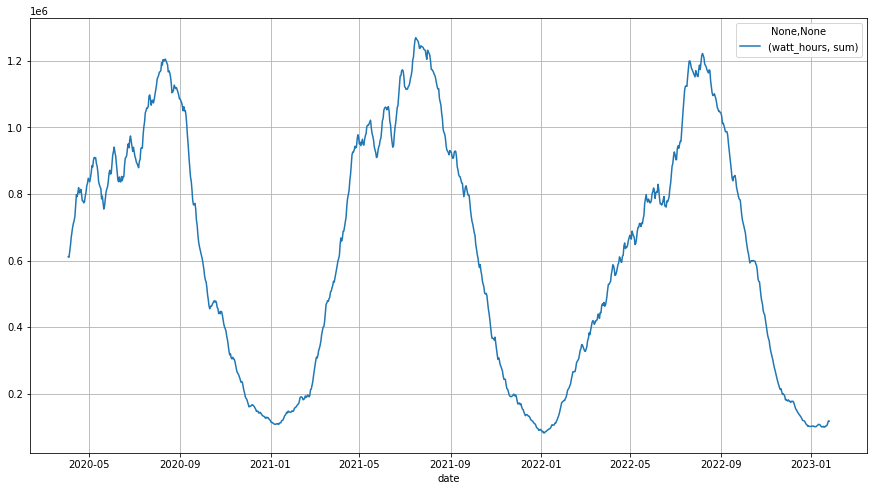

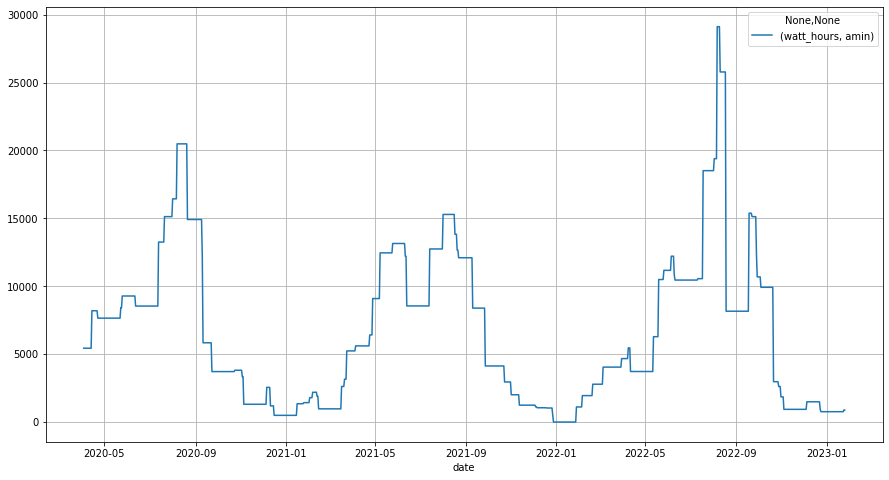

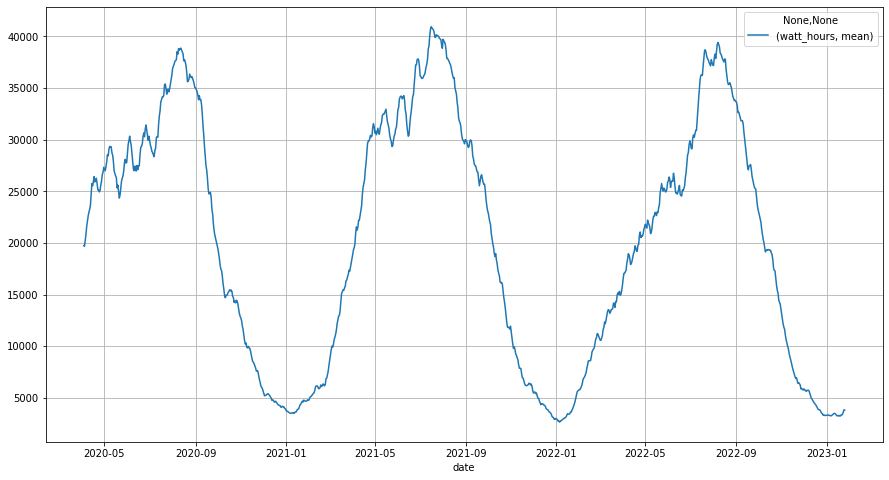

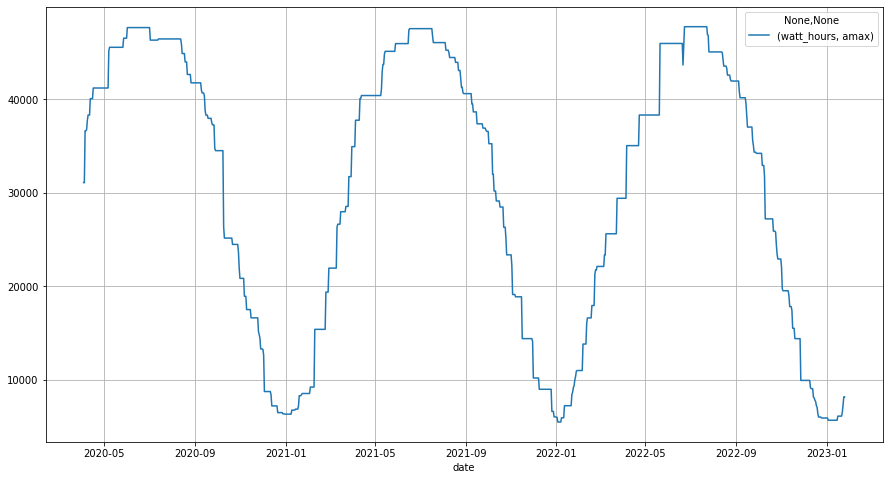

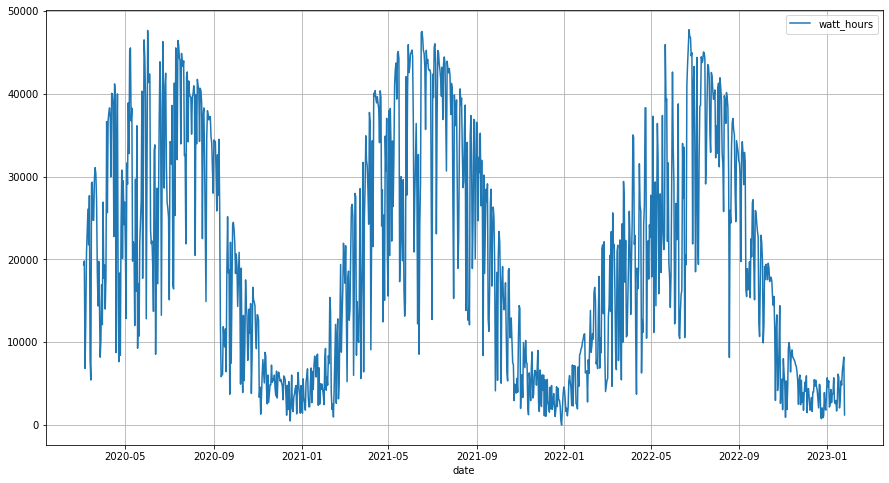

In [6]:
for flea in [9, 4, 10, 11, 0, 1, 3]:
    print('+++++++++++++++++')
    print('flea:', flea)                
    print('+++++++++++++++++')
    slap(flea)

In [7]:
ord('v') - ord('r'), ord('k') - ord('g')

(4, 4)

<AxesSubplot:xlabel='time'>

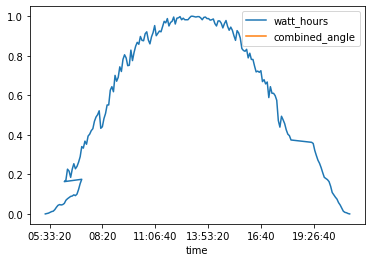

In [8]:
col = e.combined
angle_date = current_summer_solstice
kwh = e.by_date(data, e.pge_online_date(), e.today()).groupby(e.t)
angles = e.by_date(data, angle_date, angle_date).groupby(e.t)
kwh_maxed = kwh[e.wh].agg(np.max)
angles_maxed = angles[col].agg(np.max)
kwh_normalized = pd.DataFrame(kwh_maxed)/kwh_maxed.max()
angle_normalized = pd.DataFrame(angles_maxed)/angles_maxed.max()
normalized = kwh_normalized.join(angle_normalized, on='time')
normalized_with_ratio = normalized.assign(ratio = lambda x: x[e.wh] / x[col])
normalized.plot()

<AxesSubplot:xlabel='time'>

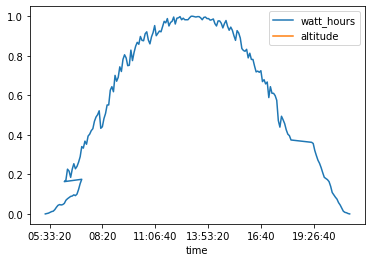

In [9]:
col = e.alt
angle_date = current_summer_solstice
kwh = e.by_date(data, e.pge_online_date(), e.today()).groupby(e.t)
angles = e.by_date(data, angle_date, angle_date).groupby(e.t)
kwh_maxed = kwh[e.wh].agg(np.max)
angles_maxed = angles[col].agg(np.max)
kwh_normalized = pd.DataFrame(kwh_maxed)/kwh_maxed.max()
angle_normalized = pd.DataFrame(angles_maxed)/angles_maxed.max()
normalized = kwh_normalized.join(angle_normalized, on='time')
normalized_with_ratio = normalized.assign(ratio = lambda x: x[e.wh] / x[col])
normalized.plot()

<AxesSubplot:xlabel='time'>

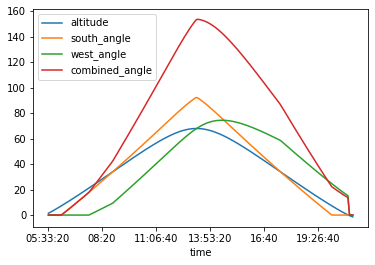

In [10]:
days = 366 if isleap(current_summer_solstice.year) else 365
angle_date = current_summer_solstice - timedelta(days=days)
angles = e.by_date(data, angle_date, angle_date)
angles[[e.t, e.alt, e.south, e.west, e.combined]].plot(x=e.t)

In [11]:
wh = pd.DataFrame(data.groupby(e.t)[e.wh].max(), columns=[e.wh])
angles = pd.DataFrame(e.by_date(data, current_summer_solstice, current_summer_solstice).groupby(e.t)[e.combined].max(), columns=[e.combined])
joined = wh.join(angles, on=e.t)
joined.assign(factor=lambda x: x[e.wh] / x[e.combined])
print(wh)
print(angles)
print(joined.head(60))

                watt_hours
time                      
05:20:00-07:00           0
05:25:00-07:00           1
05:30:00-07:00           2
05:35:00-07:00           4
05:40:00-07:00           6
...                    ...
21:00:00-07:00           7
21:05:00-07:00           4
21:10:00-07:00           3
21:15:00-07:00           1
21:20:00-07:00           0

[193 rows x 1 columns]
Empty DataFrame
Columns: [combined_angle]
Index: []
                watt_hours  combined_angle
time                                      
05:20:00-07:00           0             NaN
05:25:00-07:00           1             NaN
05:30:00-07:00           2             NaN
05:35:00-07:00           4             NaN
05:40:00-07:00           6             NaN
05:45:00-07:00           7             NaN
05:50:00-07:00          11             NaN
05:55:00-07:00          17             NaN
06:00:00-07:00          22             NaN
06:05:00-07:00          24             NaN
06:10:00-07:00          23             NaN
06:15:00-07:00

In [12]:
angle_date = current_summer_solstice
angles_sum = e.by_date(data, angle_date, angle_date)[[e.combined]].sum()
print(angles_sum)

combined_angle    0.0
dtype: float64


In [13]:
data.groupby(e.t)[e.wh].max().sum()

56578

In [14]:
data

,date,time,date_time,watts,watt_hours,forward,backward,peak,altitude,azimuth,south_angle,west_angle,combined_angle
0,2020-03-04,06:20:00-08:00,2020-03-04 06:20:00-08:00,1,0,0,19355,0,-15.262585,83.113328,0.000000,0.000000,0.000000
1,2020-03-04,06:25:00-08:00,2020-03-04 06:25:00-08:00,1,0,0,19355,0,-14.391195,84.030342,0.000000,0.000000,0.000000
2,2020-03-04,06:30:00-08:00,2020-03-04 06:30:00-08:00,1,0,0,19355,0,-13.518353,84.942309,0.000000,0.000000,0.000000
3,2020-03-04,06:35:00-08:00,2020-03-04 06:35:00-08:00,1,0,0,19355,0,-12.644285,85.849706,0.000000,0.000000,0.000000
4,2020-03-04,06:40:00-08:00,2020-03-04 06:40:00-08:00,1,0,0,19355,0,-11.769216,86.752992,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155265,2023-01-25,12:35:00-08:00,2023-01-25 12:35:00-08:00,371,31,1098,118,0,24.715169,167.497248,45.918690,21.294372,65.083625
155266,2023-01-25,12:40:00-08:00,2023-01-25 12:40:00-08:00,351,29,1127,87,0,24.895703,168.784356,46.451382,21.827063,66.095739
155267,2023-01-25,12:45:00-08:00,2023-01-25 12:45:00-08:00,332,28,1155,58,0,25.056942,170.076382,46.966123,22.341805,67.073747
155268,2023-01-25,12:50:00-08:00,2023-01-25 12:50:00-08:00,360,30,1185,30,0,25.198730,171.372793,47.462614,22.838295,68.017079
